In [1]:
from NEASE import nease
import pandas as pd

### Input of NEASE

In [2]:
# MAJIQ output from diff splicing analysis
table=pd.read_table('AS data/Platelet/RP_MP.deltapsi.tsv')
table.head(10)

,Gene ID,LSV ID,LSV Type,E(dPSI) per LSV junction,P(|dPSI|>=0.20) per LSV junction,P(|dPSI|<=0.05) per LSV junction,RP E(PSI),MP E(PSI),A5SS,A3SS,ES,Num. Junctions,Num. Exons,Junctions coords,IR coords
0,gene:ENSG00000114541,gene:ENSG00000114541:s:69216263-69216349,s|1e1.1o1|1e2.1o1,-0.005782585546726535;0.005782614800287916,9.131576598358074e-08;9.137648207446503e-08,0.0014495511204322131;0.0014494803303662547,0.129;0.871,0.118;0.882,False,False,True,2,3,69203663-69216263;69198774-69216263,NaN
1,gene:ENSG00000013016,gene:ENSG00000013016:t:31249371-31249468,t|1e1.1o1|1e2.1o1,-1.0409200397050978e-06;1.0409449796065466e-06,2.161478452922632e-17;5.7633005667787e-21,0.33219023968248607;0.38387259150734654,0.989;0.011,0.997;0.003,False,False,True,2,3,31244450-31249371;31247600-31249371,NaN
2,gene:ENSG00000163249,gene:ENSG00000163249:t:207737411-207737446,t|1e1.1o1|1e2.1o1,-0.006480923483079155;0.006480959095261932,7.146387919964888e-21;1.1103874466436185e-16,0.007480946095522967;0.0074801906689989,0.077;0.923,0.057;0.943,False,False,True,2,3,207726876-207737411;207734047-207737411,NaN
3,gene:ENSG00000175768,gene:ENSG00000175768:s:37592253-37592604,s|1e1.1o1|2e1.1o1|3e1.1o1|4e1.1o1,5.0463835495277774e-05;-5.904803237012686e-05;1.652412460086734e-05;4.883323744520894e-08,3.4130326357216425e-15;5.778230516273508e-21;5.7668534394596114e-21;5.763076690348758e-21,0.3922110608923171;0.47500375739463974;0.3126653507651424;0.4795173035424664,0.974;0.024;0.001;0.001,0.986;0.001;0.011;0.001,True,False,False,4,2,37588932-37592412;37588932-37592310;37588932-37592291;37588932-37592253,NaN
4,gene:ENSG00000171314,gene:ENSG00000171314:s:97426191-97426446,s|1e1.1o1|1e2.1o1,4.724984506503472e-08;-4.723727326833177e-08,5.763080448213274e-21;5.7630784096046076e-21,0.479667324307433;0.46310685173120447,0.000;1.000,0.002;0.998,False,False,True,2,3,97426446-97427101;97426446-97430379,NaN
5,gene:ENSG00000070081,gene:ENSG00000070081:t:17337348-17337534,t|1e1.1o2|1e2.2o2|1e3.1o1,-1.4839999072041732e-07;-0.035078352364741286;0.037720949966424555,5.763302677270467e-21;3.776108853996125e-06;5.60355759993587e-06,0.3796385258587732;0.001549123232391536;0.0013406243550228008,0.002;0.071;0.927,0.002;0.002;0.996,False,False,True,3,4,17330983-17337348;17334480-17337348;17337083-17337348,NaN
6,gene:ENSG00000156642,gene:ENSG00000156642:t:73591636-73592137,t|1e1.1o1|1e2.1o1|2e3.1o1,1.5128644572790744e-06;-2.630621068413839e-07;7.771559807339239e-16,5.763417672044591e-21;5.7631380231416315e-21;5.763072138872256e-21,0.475146975780804;0.4758444014231338;0.9999999984380891,0.970;0.028;0.001,0.986;0.012;0.002,False,True,True,3,4,73592137-73633125;73592137-73597022;73592069-73633125,NaN
7,gene:ENSG00000161911,gene:ENSG00000161911:s:41150819-41150907,s|1e1.1o1|1e2.1o1,-0.05734912848878308;0.05734912889360104,0.010621172501803064;0.010621173632136029,0.00016518971012491335;0.00016517468688905098,0.358;0.642,0.274;0.726,False,False,True,2,3,41150313-41150819;41149918-41150819,NaN
8,gene:ENSG00000124164,gene:ENSG00000124164:t:58434602-58434705,t|1e1.1o1|1e2.1o1,-0.0015125388535255117;0.0015125458359988829,9.615180636165624e-09;9.41502720231469e-09,0.012035152551162942;0.012034076718232346,0.999;0.001,0.973;0.027,False,False,True,2,3,58418363-58434602;58432416-58434602,NaN
9,gene:ENSG00000176261,gene:ENSG00000176261:t:32633951-32634110,t|1e1.1o3|1e1.3o3|1e2.1o2|1e2.2o2|2e3.2o3|2e4.1o2|2e4.2o2,-0.0035510075011086816;-0.014161488820529144;0.12375973296675297;-0.0012751712488021686;-9.313197791306263e-11;-0.022835413884216206;-0.009522066851940745,1.0530855212983533e-10;9.39968337602077e-21;0.09807546993960292;6.165729416343333e-21;5.763072128406005e-21;0.00020986762155967992;5.654678899262811e-06,0.004475544488970695;0.04599860912884557;5.588251358895945e-05;0.35853428549474475;0.9054120524728562;0.0004564742616615103;0.0011360765182913957,0.076;0.053;0.253;0.034;0.001;0.309;0.275,0.061;0.000;0.387;0.028;0.000;0.269;0.254,True,True,True,7,5,32634110-32650433;32634110-32650402;326341

### Run NEASE

In [3]:
# Run nease with standard input.
events=nease.run(table, organism='Human',input_type='MAJIQ')

Processing MAJIQ format...
MAJIQ output converted successfully to NEASE format.

		Data Summary
**************************************************
25 protein domains are affected by AS.

1 linear motifs are affected by AS.
6 interacting resiude are affected by AS.

17 of the affected domains/motifs have known interactions.
199 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


### Classic gene enrichment

In [4]:
# This is an enrichement at gene level: all (diff) spliced genes.
# The function use the library gseapy and need gseapy_databases parameter 
# let first check what libraries are available on gseapy for Human

import gseapy as gp
Human = gp.get_library_name(database='Human')
Human[:5]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues']

In [5]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016'])
enr.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,13/420,0.000061,0.023331,0,0,3.977068,38.598171,ARF4;ARF1;VPS37A;ANK1;BICD1;TBC1D1;MAN2A1;KIF5B;UBC;RAB3GAP2;EXOC5;AP3S1;RAB6A
1,Reactome_2016,RORA activates gene expression Homo sapiens R-HSA-1368082,4/27,0.000074,0.023331,0,0,20.877997,198.528342,NCOA1;NCOA2;TBL1XR1;NRIP1
2,Reactome_2016,Circadian Clock Homo sapiens R-HSA-400253,5/63,0.000192,0.038521,0,0,10.393713,88.945539,NCOA1;NCOA2;TBL1XR1;NRIP1;UBC
3,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-5653656,13/492,0.000290,0.038521,0,0,3.366736,27.418967,ARF4;ARF1;VPS37A;ANK1;BICD1;TBC1D1;MAN2A1;KIF5B;UBC;RAB3GAP2;EXOC5;AP3S1;RAB6A
4,Reactome_2016,Golgi-to-ER retrograde transport Homo sapiens R-HSA-8856688,6/110,0.000345,0.038521,0,0,6.982185,55.653094,ARF4;ARF1;KIF5B;RAB3GAP2;RAB6A;BICD1
5,Reactome_2016,"BMAL1:CLOCK,NPAS2 activates circadian gene expression Homo sapiens R-HSA-1368108",4/42,0.000429,0.038521,0,0,12.627113,97.920296,NCOA1;NCOA2;TBL1XR1;NRIP1
6,Reactome_2016,Activation of gene expression by SREBF (SREBP) Homo sapiens R-HSA-2426168,4/42,0.000429,0.038521,0,0,12.627113,97.920296,NCOA1;NCOA2;TBL1XR1;FDFT1
7,Reactome_2016,Pink/Parkin Mediated Mitophagy Homo sapiens R-HSA-5205685,3/22,0.000811,0.052538,0,0,18.844642,134.121043,UBC;ATG12;ATG5
8,Reactome_2016,Mitophagy Homo sapiens R-HSA-5205647,3/22,0.000811,0.052538,0,0,18.844642,134.121043,UBC;ATG12;ATG5
9,Reactome_2016,Intra-Golgi and retrograde Golgi-to-ER traffic Homo sapiens R-HSA-6811442,7/179,0.000835,0.052538,0,0,4.938738,35.004616,ARF4;ARF1;MAN2A1;KIF5B;RAB3GAP2;RAB6A;BICD1


### NEASE analysis


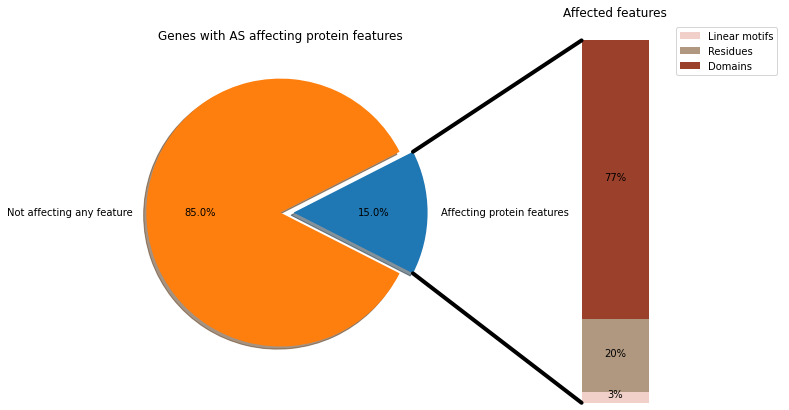

In [6]:
events.get_stats("AS data/")

In [7]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains()

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,PPM1A,5494,ENSG00000100614,ENSE00003598557,PF00481,0.577477,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003598557
1,SCFD2,152579,ENSG00000184178,ENSE00001327240,PF00995,0.545700,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001327240
2,PTPN12,5782,ENSG00000127947,ENSE00003466075,PF00102,0.539035,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003466075
3,ERLEC1,27248,ENSG00000068912,ENSE00000752711,PF07915,0.515317,False,None,
4,GNAQ,2776,ENSG00000156052,ENSE00001274239,PF00503,0.457661,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001274239
5,DYNC1LI1,51143,ENSG00000144635,ENSE00003565423,PF05783,0.457264,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003565423
6,MYOM1,8736,ENSG00000101605,ENSE00001240567,PF00041,0.436869,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001240567
7,GRK3,157,ENSG00000100077,ENSE00003677641,PF00615,0.434388,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003677641
8,UBE2V2,7336,ENSG00000169139,ENSE00003509614,PF00179,0.427618,True,DDI and DMI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003509614
9,CBR4,84869,ENSG00000145439,ENSE00002050409,PF00106,0.417737,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002050409


In [8]:
# get the affected linear motifs
events.get_elm()

,Gene name,entrezgene,Gene stable ID,ELMIdentifier,dPSI,ELM link
0,PAWR,5074,ENSG00000177425,LIG_SPRY_1,0.395266,http://elm.eu.org/elms/LIG_SPRY_1


In [9]:
# get interacting residues affected by AS
events.get_pdb()

,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,ROCK2,9475,ENSG00000134318,ROCK2,9475
1,CBR4,84869,ENSG00000145439,HSD17B8,7923
2,UGP2,7360,ENSG00000169764,UGP2,7360
3,UBE2V2,7336,ENSG00000169139,"RPS27A,UBB,UBA52,UBC","6233,7314,7311,7316"
4,GNAQ,2776,ENSG00000156052,"PLCB3,ARHGEF25","5331,115557"
5,SSBP2,23635,ENSG00000145687,"SSBP2,SSBP3,SSBP4","23635,23648,170463"


In [10]:
# List of affected interactions (domain binding)

events.get_edges()

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,UBE2V2,7336,PF00179,0.427618,34,"UBE2V1,OTUB1,MUL1,UBXN1,TRIM54,BIRC2,DZIP3,RC3H1,TRIM63,TP53,SHPRH,STUB1,UBE2L3,TRIM21,RFFL,HLTF,XIAP,MKRN3,RNF2,RNF8,TRAF2,UBE2M,RBCK1,ZNRF1,UBC,UBE2B,TRIM32,RAD23B,LNX1,RNF11,UBE2N,TRIM5,TPT1,RC3H2","55611,7335,79594,51035,57159,329,9666,149041,84676,7157,257218,10273,7332,6737,117584,6596,331,7681,6045,9025,7186,9040,10616,84937,7316,7320,22954,5887,84708,26994,7334,85363,7178,54542"
1,GNAQ,2776,PF00503,0.457661,34,"GNG3,RGS4,RGS2,GNB3,GNG4,GNB4,WDR36,S1PR1,PTGIR,GRK2,ARHGEF11,GNB1,CDK19,MRGPRX1,ARHGEF12,ARHGEF1,RGS16,VIPR1,AKAP13,CCR1,GNB2,S1PR2,F2R,PLCB1,RGS5,PLCB2,TBXA2R,RGS18,ATP4A,GNAS,UBQLN2,P2RY8,RGS7,LINC02210","2785,5999,5997,2784,2786,59345,134430,1394,1901,5739,156,9826,2782,23097,259249,23365,9138,6004,7433,11214,1230,2783,9294,2149,23236,8490,6915,64407,495,2778,29978,286530,6000,5330"
2,PTPN12,5782,PF00102,0.539035,28,"SHC1,ERBB3,MAPK1,NTRK1,TNS3,PTK7,NEDD9,FGFR2,AATK,PLCG1,JAK2,PTK2B,GRB2,PTPN6,ASAP1,ROR2,CSK,NCK2,SORBS2,KDR,IGF1R,NCK1,BCAR1,PACSIN2,ERBB4,EGFR,FGFR4,LMTK2","6464,2065,5594,4914,64759,5754,4739,2263,9625,5335,3717,2185,2885,5777,50807,4920,1445,8440,8470,3791,3480,4690,9564,11252,2066,1956,2264,22853"
3,PRKCA,5578,PF00130,0.370855,23,"NCF1,PRKCH,DLG4,CHUK,PRKCA,MAPK7,PRKCG,FGD4,NOXA1,PLA2G4A,GSK3B,IKBKB,AKAP13,PLD1,AFAP1,TIAM1,RALBP1,GSK3A,PLEKHA4,SMURF1,PLCG2,WWC1,PRKCB","653361,5583,1742,1147,5578,5598,5582,121512,10811,5321,2932,3551,11214,5337,60312,7074,10928,2931,57664,57154,5336,23286,5579"
4,RAB6A,5870,PF00071,0.267053,22,"ERC1,GDI1,KRAS,RAB11A,RAB1B,SYTL5,RAB1A,RAB6B,TGFBR2,RABGAP1,NRAS,NPHP1,ARF1,HRAS,PLEKHA4,RAB2A,OCRL,RAB7A,RAB11B,RAB9A,CHM,CHML","23085,2664,3845,8766,81876,94122,5861,51560,7048,23637,4893,4867,375,3265,57664,5862,4952,7879,9230,9367,1121,1122"
5,PPM1A,5494,PF00481,0.577477,15,"PKN1,PPM1B,AKT1,PAK4,PRKAA1,PRKCA,CDC42BPA,PLK3,PAK1,PRKCI,CHEK1,MAP4K5,PAK2,CDC42BPB,MAPK9","5585,5495,207,10298,5562,5578,8476,1263,5058,5584,1111,11183,5062,9578,5601"
6,ARF4,378,PF00025,0.320421,10,"PLEKHA4,RAB11A,CDK9,NRAS,IDH1,ASB14,RAB9A,CDK2,ARF1,GRK5","57664,8766,1025,4893,3417,142686,9367,1017,375,2869"
7,PAWR,5074,LIG_SPRY_1,0.395266,5,"TRIM21,FBXO45,SPSB2,SPSB4,SPSB1","200933,6737,80176,92369,84727"
8,GRK3,157,PF00615,0.434388,4,"ADRB2,GRK2,CXCR4,CCR4","154,156,7852,1233"
9,SCFD2,152579,PF00995,0.545700,3,"SEC22B,STX12,VAMP4","9554,23673,8674"


### NEASE edge enrichment 

In [11]:
nease_enr=events.enrich(database=['Reactome'])
nease_enr.head(40)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 100 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-388396,GPCR downstream signalling,Reactome,"PPM1A (2), PTPN12 (5), GNAQ (30), GRK3 (4), ARHGEF12 (1), PRKCA (9), ARF4 (2), RAB6A (3), ROCK2 (1)",8.000286e-25,1.327515e-21,48.193789
1,R-HSA-372790,Signaling by GPCR,Reactome,"PPM1A (2), PTPN12 (5), GNAQ (30), GRK3 (4), ARHGEF12 (1), PRKCA (9), ARF4 (2), RAB6A (3), ROCK2 (1)",1.463633e-24,1.327515e-21,47.669136
2,R-HSA-416476,G alpha (q) signalling events,Reactome,"PPM1A (1), PTPN12 (3), GNAQ (15), GRK3 (1), PRKCA (3), ARF4 (2), RAB6A (3)",8.624395e-13,3.911163e-10,26.976531
3,R-HSA-418594,G alpha (i) signalling events,Reactome,"PPM1A (1), PTPN12 (1), GNAQ (19), GRK3 (3), PRKCA (3)",2.793136e-14,1.688916e-11,23.476057
4,R-HSA-199991,Membrane Trafficking,Reactome,"PPM1A (1), SCFD2 (2), PTPN12 (3), GNAQ (2), DYNC1LI1 (3), GRK3 (2), UBE2V2 (4), BICD1 (2), PRKCA (1), ARF4 (3), RAB6A (13)",1.460389e-07,1.655715e-05,16.743565
5,R-HSA-162582,Signal Transduction,Reactome,"PPM1A (8), PTPN12 (21), GNAQ (30), DYNC1LI1 (3), GRK3 (4), UBE2V2 (12), ARHGEF12 (1), PRKCA (19), ARF4 (4), RAB6A (6), ROCK2 (1)",3.341040e-08,5.509679e-06,16.717109
6,R-HSA-500792,GPCR ligand binding,Reactome,"GNAQ (15), GRK3 (3)",1.820063e-12,6.603189e-10,16.602745
7,R-HSA-6811442,Intra-Golgi and retrograde Golgi-to-ER traffic,Reactome,"SCFD2 (2), DYNC1LI1 (3), BICD1 (2), PRKCA (1), ARF4 (2), RAB6A (5)",4.053087e-08,6.126916e-06,16.529493
8,R-HSA-416482,G alpha (12/13) signalling events,Reactome,"GNAQ (11), ARHGEF12 (1), PRKCA (3), ROCK2 (1)",1.562576e-08,2.834513e-06,15.612318
9,R-HSA-5653656,Vesicle-mediated transport,Reactome,"PPM1A (1), SCFD2 (2), PTPN12 (3), GNAQ (2), DYNC1LI1 (3), GRK3 (2), UBE2V2 (4), BICD1 (2), PRKCA (1), ARF4 (3), RAB6A (13)",4.729478e-07,4.085368e-05,15.493480


### Pathway specific analysis

In [12]:
# GPCR downstream signalling
best_path=events.path_analysis('R-HSA-388396')
best_path

Enrichment of the pathway: GPCR downstream signalling.

Overall p_value:  8.000286444589072e-25




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GNAQ,2776,True,30/36,5.241948e-32,"GNG3,RGS4,RGS2,GNB3,PLCB3,GNG4,GNB4,LINC02210,S1PR1,ARHGEF25,PTGIR,GRK2,ARHGEF11,GNB1,ARHGEF12,ARHGEF1,RGS16,VIPR1,AKAP13,CCR1,GNB2,S1PR2,F2R,PLCB1,RGS5,TBXA2R,RGS18,GNAS,RGS7,PLCB2","2785,5999,5997,2784,5331,2786,59345,1394,1901,115557,5739,156,9826,2782,23365,9138,6004,7433,11214,1230,2783,9294,2149,23236,8490,6915,64407,2778,6000,5330"
1,PRKCA,5578,True,9/23,2.366646e-06,"PRKCH,PRKCA,MAPK7,PRKCG,FGD4,PLA2G4A,AKAP13,TIAM1,PRKCB","5583,5578,5598,5582,121512,5321,11214,7074,5579"
2,GRK3,157,True,4/4,1.031094e-05,"ADRB2,GRK2,CXCR4,CCR4","154,156,7852,1233"
3,PTPN12,5782,False,5/28,1.923969e-02,"SHC1,MAPK1,JAK2,GRB2,EGFR","6464,5594,3717,2885,1956"
4,ROCK2,9475,True,1/1,5.667801e-02,ROCK2,9475
5,ARF4,378,False,2/10,1.067992e-01,"NRAS,GRK5","4893,2869"
6,RAB6A,5870,False,3/22,1.257619e-01,"KRAS,NRAS,HRAS","3845,4893,3265"
7,ARHGEF12,23365,True,1/3,1.605802e-01,ARHGEF12,23365
8,PPM1A,5494,False,2/15,2.076054e-01,"AKT1,PRKCA","207,5578"


In [13]:
events.path_analysis('R-HSA-76002')

Enrichment of the pathway: Platelet activation, signaling and aggregation.

Overall p_value:  0.00013230483268074936




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GNAQ,2776,True,8/36,0.000184,"GNG3,GNB3,GNG4,GNB4,GNB1,GNB2,F2R,TBXA2R","2785,2784,2786,59345,2782,2783,2149,6915"
1,PRKCA,5578,True,6/23,0.000472,"PRKCH,PRKCA,PRKCG,PLA2G4A,PLCG2,PRKCB","5583,5578,5582,5321,5336,5579"
2,PTPN12,5782,False,6/28,0.001448,"SHC1,MAPK1,GRB2,PTPN6,CSK,BCAR1","6464,5594,2885,5777,1445,9564"
3,PPM1A,5494,False,2/15,0.148566,"AKT1,PRKCA","207,5578"


### Visualization

In [14]:
# Finally we can visualize affected pathways with nease
# you can run this function several times to get a  better visualization

events.Vis_path("R-HSA-388396",file='AS data',k=0.8)

Enrichment of the pathway: GPCR downstream signalling.

Overall p_value:  8.000286444589072e-25


Visualization of the pathway generated in: GPCR downstream signalling.html


In [15]:
events.Vis_path('R-HSA-76002',file='AS data',k=0.8,auto_open=True)

Enrichment of the pathway: Platelet activation, signaling and aggregation.

Overall p_value:  0.00013230483268074936


Visualization of the pathway generated in: Platelet activation, signaling and aggregation.html


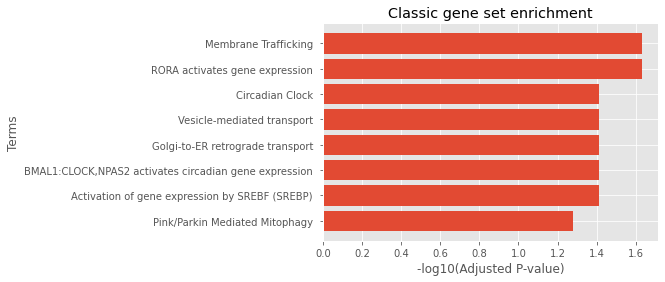

In [16]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:8]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/Platelet/classic_en.pdf',format='pdf',bbox_inches='tight')

plt.show()

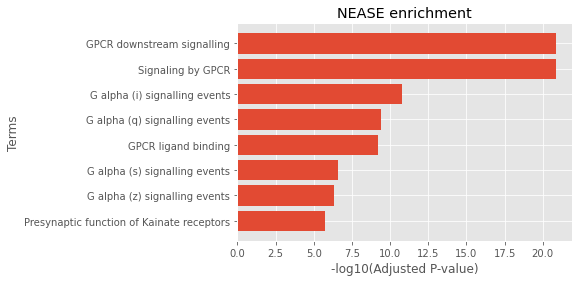

In [17]:
nease_enr=nease_enr.sort_values(by='adj p_value')
Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/Platelet/nease_en.pdf',format='pdf',bbox_inches='tight')
plt.show()

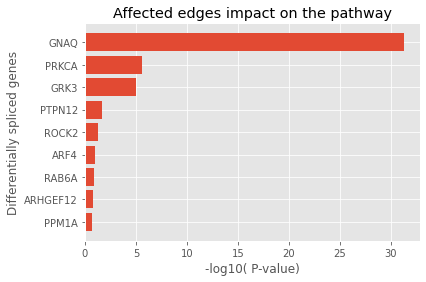

In [18]:

Genes = best_path['Spliced genes']
Pvalues =best_path['p_value']
Pvalues=[ -np.log10(x) for x in Pvalues]


plt.barh(Genes[::-1],Pvalues[::-1] )
plt.title('Affected edges impact on the pathway')
plt.ylabel('Differentially spliced genes')
plt.xlabel('-log10( P-value)')
plt.savefig('AS data/Platelet/Genes.pdf',format='pdf',bbox_inches='tight')
plt.show()